In [1]:
"""
Exploratory Data Analysis (EDA) Script for:
"Early Detection of Heart Disease: A Machine Learning Approach Using CDC Health Indicators (2022)"
Author: Mariam Sitoe Lo
Date: June 16, 2025
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Configure display and aesthetics
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)



In [2]:
data_path = r"C:\\Users\\lomar\\Documents\\Mariam - Master's\\MRP\\heart_2022_no_nans.csv"
output_folder = r"C:\\Users\\lomar\\Documents\\Mariam - Master's\\MRP\Final Submission"


In [3]:
# ========================== Load Data ==========================
df=pd.read_csv(data_path)
os.makedirs(output_folder, exist_ok=True)


In [4]:
#========================== Basic Overview of Data Structure ==========================
"""Prints basic information and saves summary stats to CSV."""
print("\n========================== Basic Overview of Data Structure ==========================")
print("Df.head(): \n", df.head())
print("Df.shape: ", df.shape)
print("Null Values: \n", df.isnull().sum())
print("Columns: ", df.columns)
print("Duplicates: ", df.duplicated().sum())
print("Summary Statistics: \n", df.describe())
    
print("\nTarget Class Distribution:")
print(df['HadHeartAttack'].value_counts(normalize=True))
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})



========================== Basic Overview of Data Structure ==========================
Df.head(): 
      State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   

AttributeError: The '.style' accessor requires jinja2

In [5]:
# ========================== Clean Column Names ==========================

"""Standardizes column names by removing special characters and spaces."""
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_")
print("Cleaned column names: ", df.columns)
df=df

Cleaned column names:  Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')



===== Univariate Analysis =====


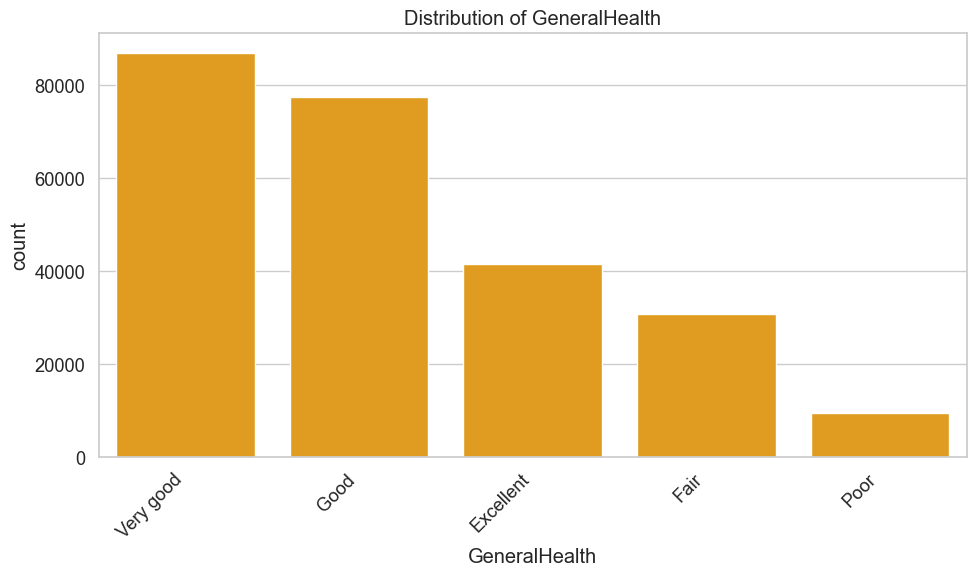

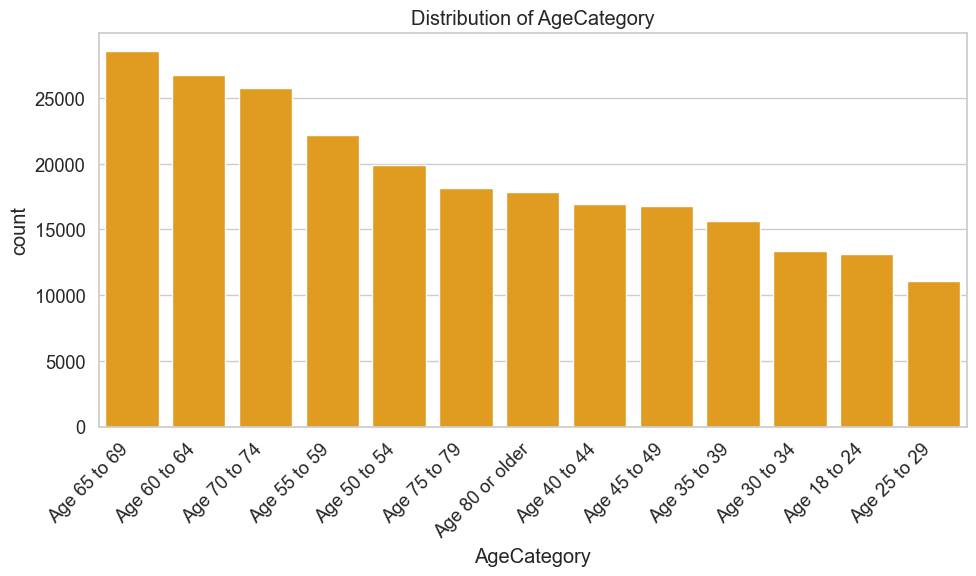

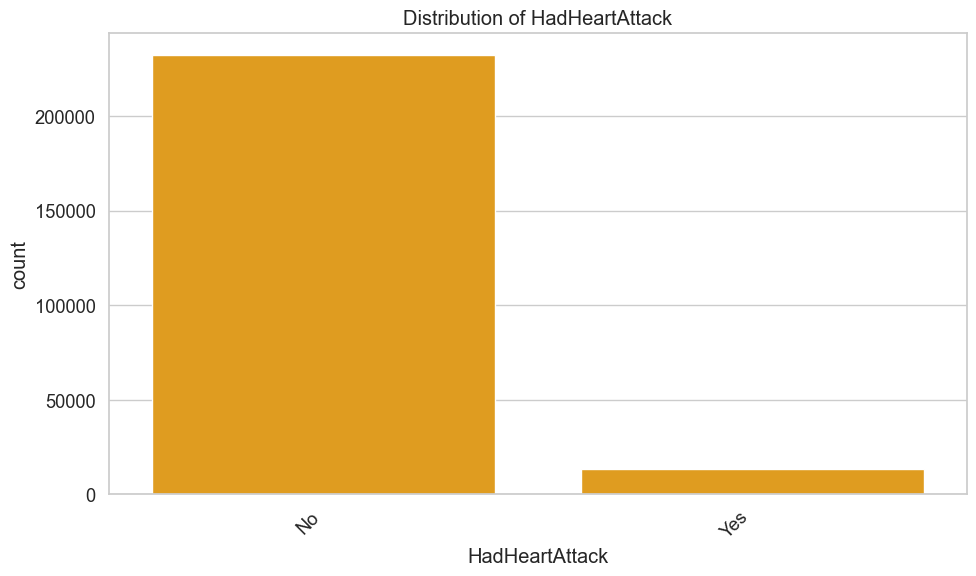

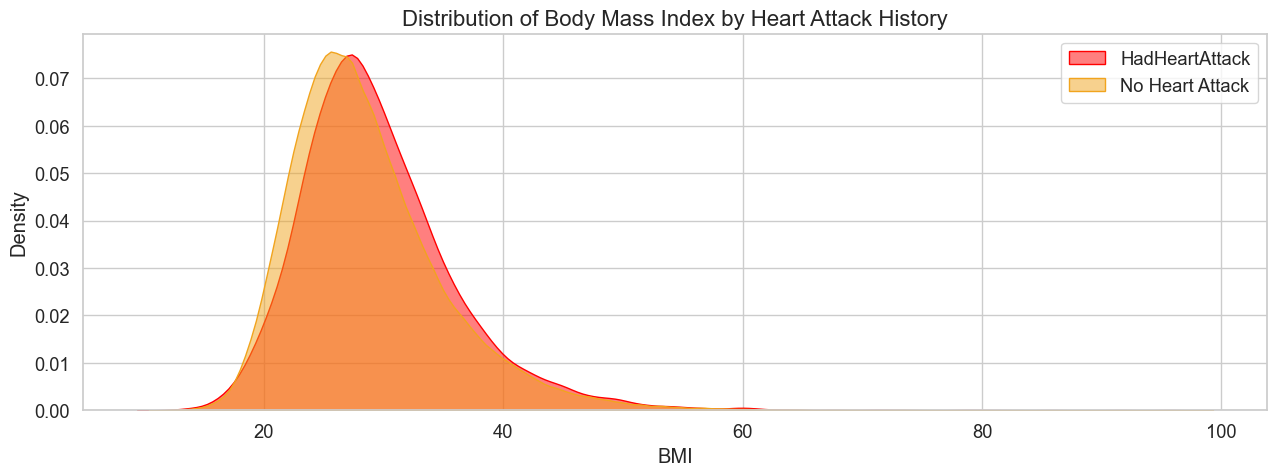

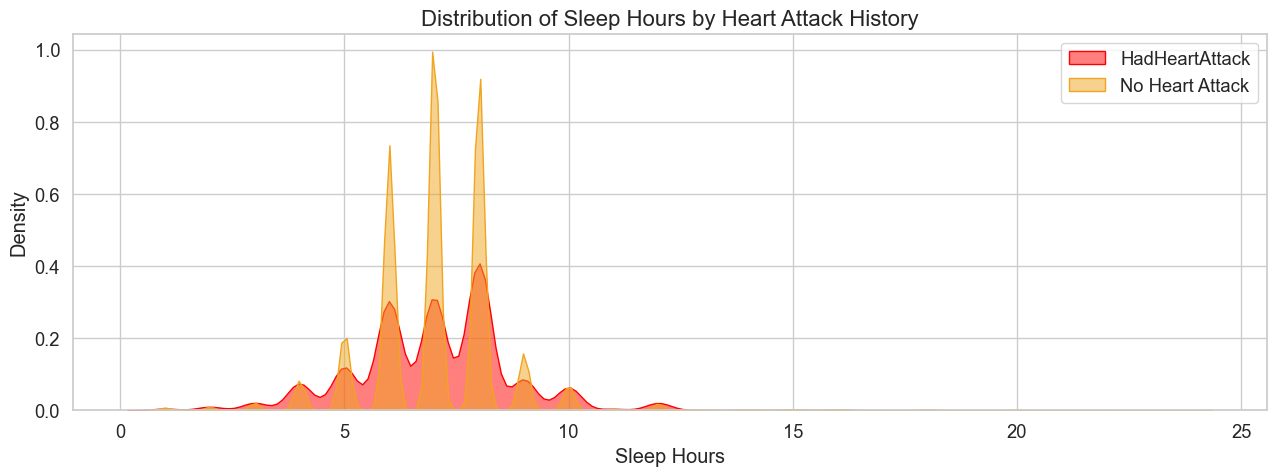

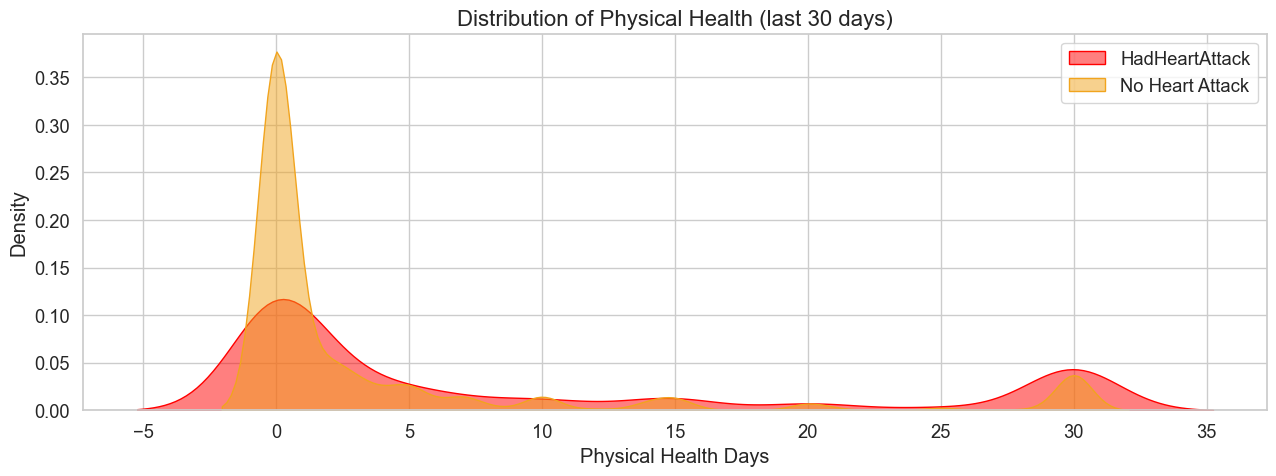

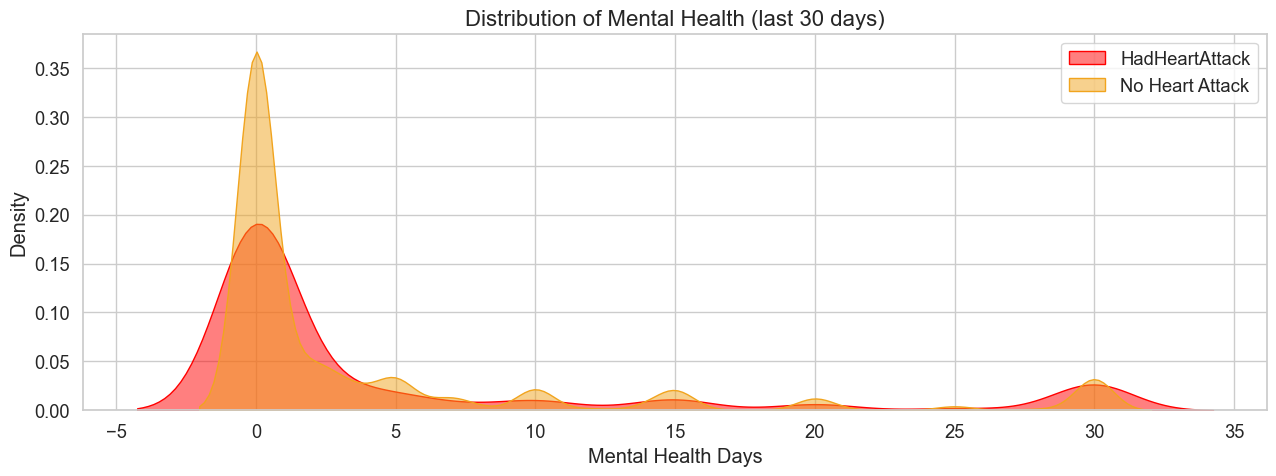

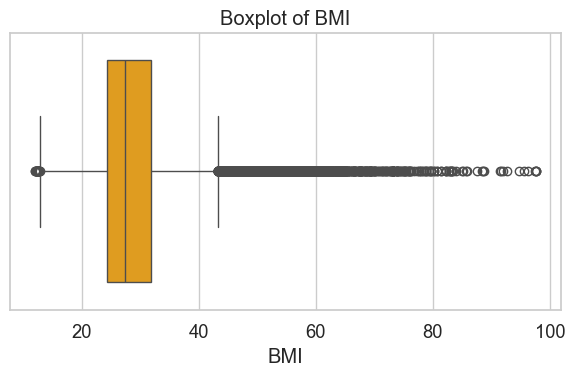

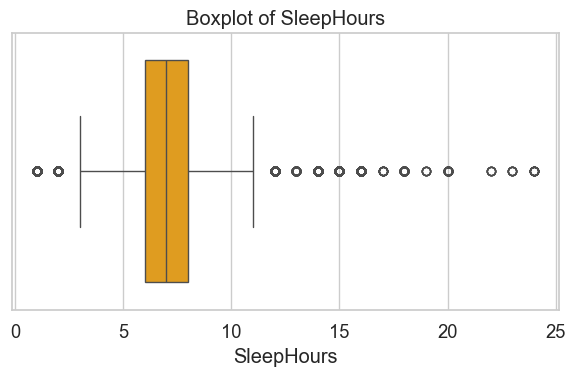

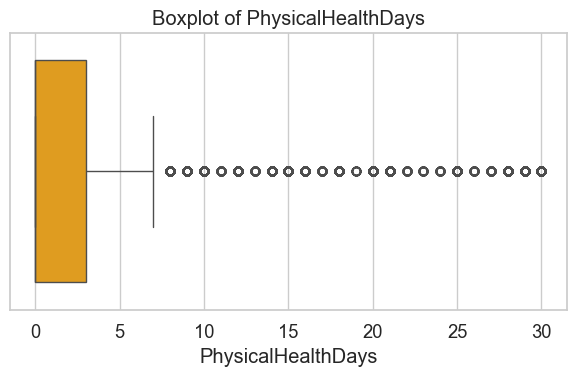

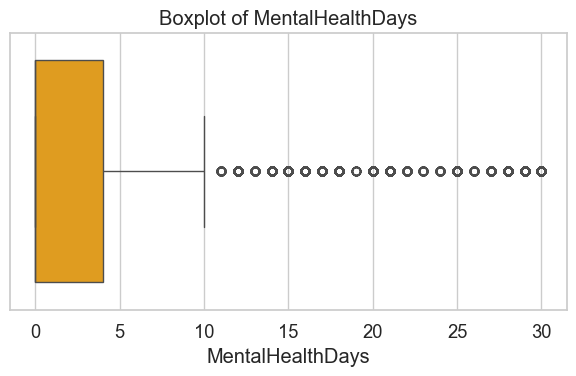

In [8]:

# ========================== Univariate Analysis ==========================


"""Generates and saves plots for general health, age, BMI, sleep hours, and target variable."""
print("\n===== Univariate Analysis =====")

for col in ['GeneralHealth', 'AgeCategory', 'HadHeartAttack']:
    #shows why we need smote
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, color='orange',order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'{col.lower()}_distribution.png'))
    plt.show()
    plt.close()

# BMI Distribution
fig, ax = plt.subplots(figsize=(13, 5))
sns.kdeplot(df[df["HadHeartAttack"] == "Yes"]["BMI"], fill=True, alpha=0.5, color="red", label="HadHeartAttack", ax=ax)
sns.kdeplot(df[df["HadHeartAttack"] == "No"]["BMI"], fill=True, alpha=0.5, color="#f1a41e", label="No Heart Attack", ax=ax)
ax.set_title('Distribution of Body Mass Index by Heart Attack History', fontsize=16)
ax.set_xlabel("BMI")
ax.set_ylabel("Density")
handles, labels = ax.get_legend_handles_labels()
if labels:
    ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'bmi_kde_distribution.png'))
plt.show()
plt.close()

# Sleep Hours Distribution
fig, ax = plt.subplots(figsize=(13, 5))
sns.kdeplot(df[df["HadHeartAttack"] == "Yes"]["SleepHours"], fill=True, alpha=0.5, color="red", label="HadHeartAttack", ax=ax)
sns.kdeplot(df[df["HadHeartAttack"] == "No"]["SleepHours"], fill=True, alpha=0.5, color="#f1a41e", label="No Heart Attack", ax=ax)
ax.set_title('Distribution of Sleep Hours by Heart Attack History', fontsize=16)
ax.set_xlabel("Sleep Hours")
ax.set_ylabel("Density")
handles, labels = ax.get_legend_handles_labels()
if labels:
    ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'sleeptime_kde_distribution.png'))
plt.show()
plt.close()

# Physical Health Days Distribution
fig, ax = plt.subplots(figsize=(13, 5))
sns.kdeplot(df[df["HadHeartAttack"] == "Yes"]["PhysicalHealthDays"], fill=True, alpha=0.5, color="red", label="HadHeartAttack", ax=ax)
sns.kdeplot(df[df["HadHeartAttack"] == "No"]["PhysicalHealthDays"], fill=True, alpha=0.5, color="#f1a41e", label="No Heart Attack", ax=ax)
ax.set_title('Distribution of Physical Health (last 30 days)', fontsize=16)
ax.set_xlabel("Physical Health Days")
ax.set_ylabel("Density")
handles, labels = ax.get_legend_handles_labels()
if labels:
    ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'physicalhealth_kde_distribution.png'))
plt.show()
plt.close()

# Mental Health Days Distribution
fig, ax = plt.subplots(figsize=(13, 5))
sns.kdeplot(df[df["HadHeartAttack"] == "Yes"]["MentalHealthDays"], fill=True, alpha=0.5, color="red", label="HadHeartAttack", ax=ax)
sns.kdeplot(df[df["HadHeartAttack"] == "No"]["MentalHealthDays"], fill=True, alpha=0.5, color="#f1a41e", label="No Heart Attack", ax=ax)
ax.set_title('Distribution of Mental Health (last 30 days)', fontsize=16)
ax.set_xlabel("Mental Health Days")
ax.set_ylabel("Density")
handles, labels = ax.get_legend_handles_labels()
if labels:
    ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'mentalhealth_kde_distribution.png'))
plt.show()
plt.close()


# Histograms and Boxplots for numerical variables
for col in ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']:


    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col],color='orange')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'{col.lower()}_boxplot.png'))
    plt.show()
    plt.close()



===== Bivariate Analysis =====


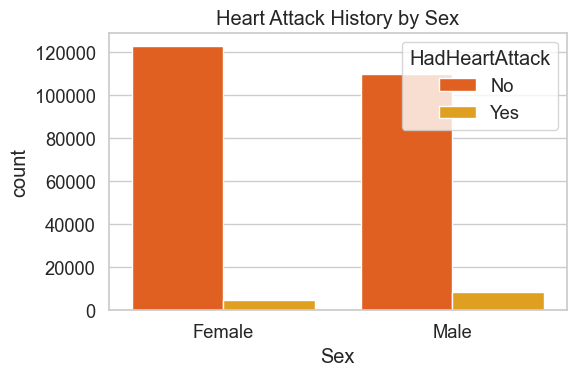

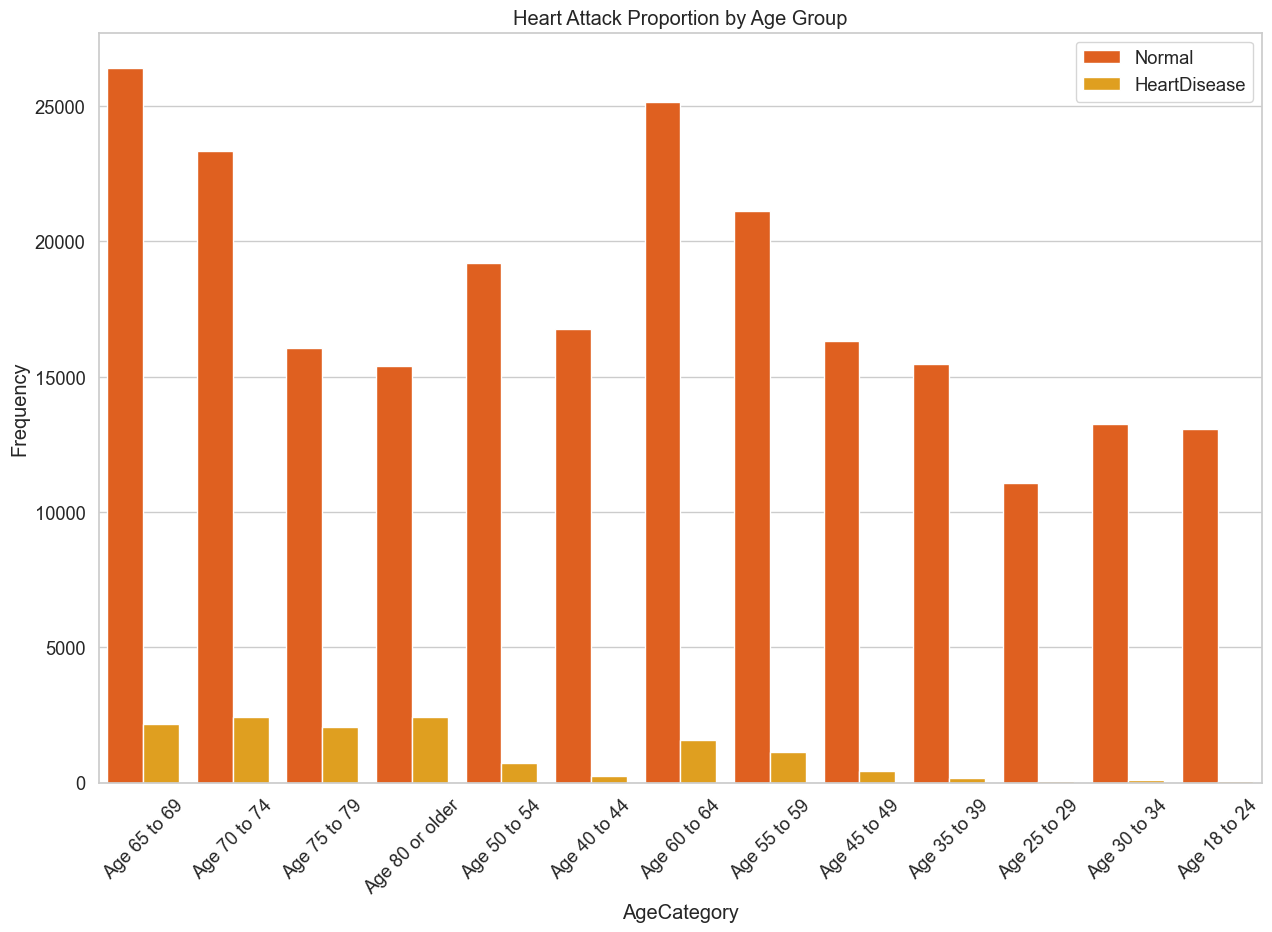

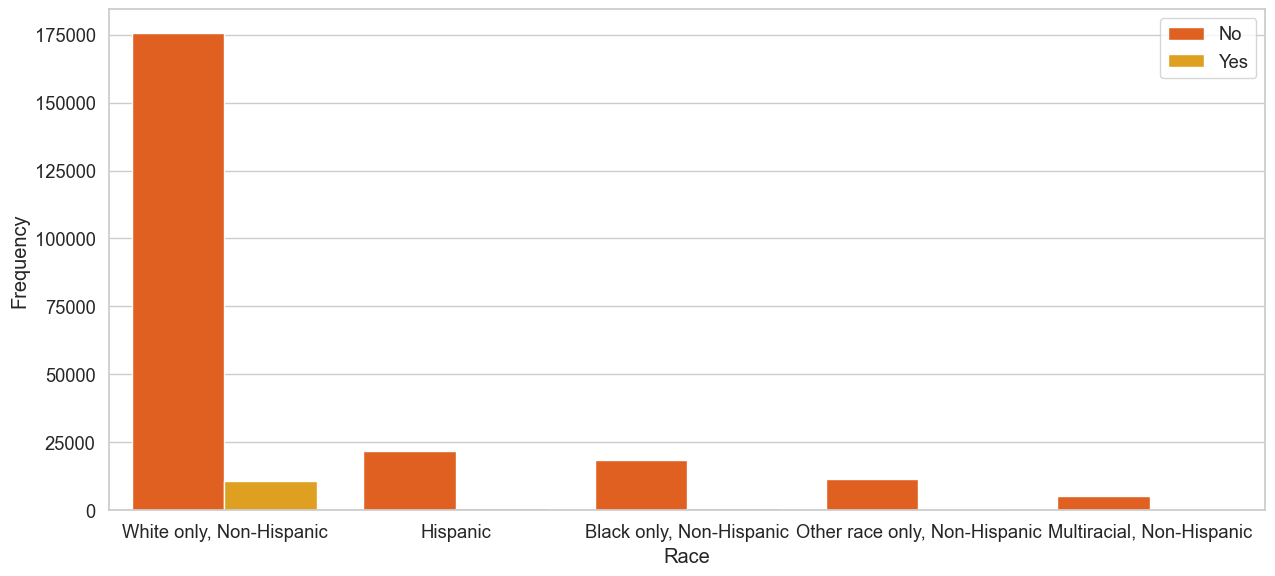


===== Chi-Square Tests =====
Sex vs HadHeartAttack: χ² = 1321.78, p = 0.0000
GeneralHealth vs HadHeartAttack: χ² = 9893.92, p = 0.0000
LastCheckupTime vs HadHeartAttack: χ² = 1240.59, p = 0.0000
PhysicalActivities vs HadHeartAttack: χ² = 1701.63, p = 0.0000
RemovedTeeth vs HadHeartAttack: χ² = 6996.87, p = 0.0000
HadAngina vs HadHeartAttack: χ² = 48908.28, p = 0.0000
HadStroke vs HadHeartAttack: χ² = 7715.62, p = 0.0000
HadAsthma vs HadHeartAttack: χ² = 138.55, p = 0.0000
HadSkinCancer vs HadHeartAttack: χ² = 599.80, p = 0.0000
HadCOPD vs HadHeartAttack: χ² = 4364.27, p = 0.0000
HadDepressiveDisorder vs HadHeartAttack: χ² = 138.00, p = 0.0000
HadKidneyDisease vs HadHeartAttack: χ² = 2939.77, p = 0.0000
HadArthritis vs HadHeartAttack: χ² = 3411.34, p = 0.0000
HadDiabetes vs HadHeartAttack: χ² = 5345.74, p = 0.0000
DeafOrHardOfHearing vs HadHeartAttack: χ² = 2345.01, p = 0.0000
BlindOrVisionDifficulty vs HadHeartAttack: χ² = 1308.27, p = 0.0000
DifficultyConcentrating vs HadHeartAttack:

In [9]:
# ========================== Bivariate Analysis ==========================
"""Analyzes relationships between features and heart attack history."""
print("\n===== Bivariate Analysis =====")

# Heart Attack by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='HadHeartAttack',palette='autumn', data=df)
plt.title("Heart Attack History by Sex")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'heart_attack_by_sex.png'))
plt.show()
plt.close()

# Heart Attack by Age Group 
plt.figure(figsize=(13, 10))
sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df, palette='autumn')
plt.title("Heart Attack Proportion by Age Group")
plt.xlabel('AgeCategory')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.legend(['Normal', 'HeartDisease'])
plt.tight_layout() 
plt.subplots_adjust(top=0.9, bottom=0.15)  
plt.savefig(os.path.join(output_folder, 'heart_attack_by_age_group.png'))
plt.show()
plt.close()



# Heart Attack by Race
plt.figure(figsize = (13,6))
sns.countplot( x= df['RaceEthnicityCategory'], hue = 'HadHeartAttack', data = df,order=df['RaceEthnicityCategory'].value_counts().index, palette = 'autumn')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'heart_attack_by_race.png'))
plt.show()
plt.close()
#Chi-square tests
print("\n===== Chi-Square Tests =====")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if col == 'HadHeartAttack' or df[col].nunique() > 10:
        continue
    contingency = pd.crosstab(df[col], df['HadHeartAttack'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col} vs HadHeartAttack: χ² = {chi2:.2f}, p = {p:.4f}")


                    SleepHours   BMI  PhysicalHealthDays  MentalHealthDays  \
SleepHours                1.00 -0.05               -0.06             -0.13   
BMI                      -0.05  1.00                0.12              0.08   
PhysicalHealthDays       -0.06  0.12                1.00              0.31   
MentalHealthDays         -0.13  0.08                0.31              1.00   
HadHeartAttack            0.00  0.03                0.13              0.03   
Sex                      -0.02  0.01               -0.04             -0.09   
AgeCategory               0.13 -0.03                0.09             -0.19   
GeneralHealth             0.00  0.00               -0.06             -0.03   
HadStroke                 0.01  0.02                0.13              0.04   
HadAsthma                -0.05  0.10                0.12              0.12   
HadSkinCancer             0.04 -0.05                0.03             -0.04   
HadCOPD                  -0.02  0.05                0.22        

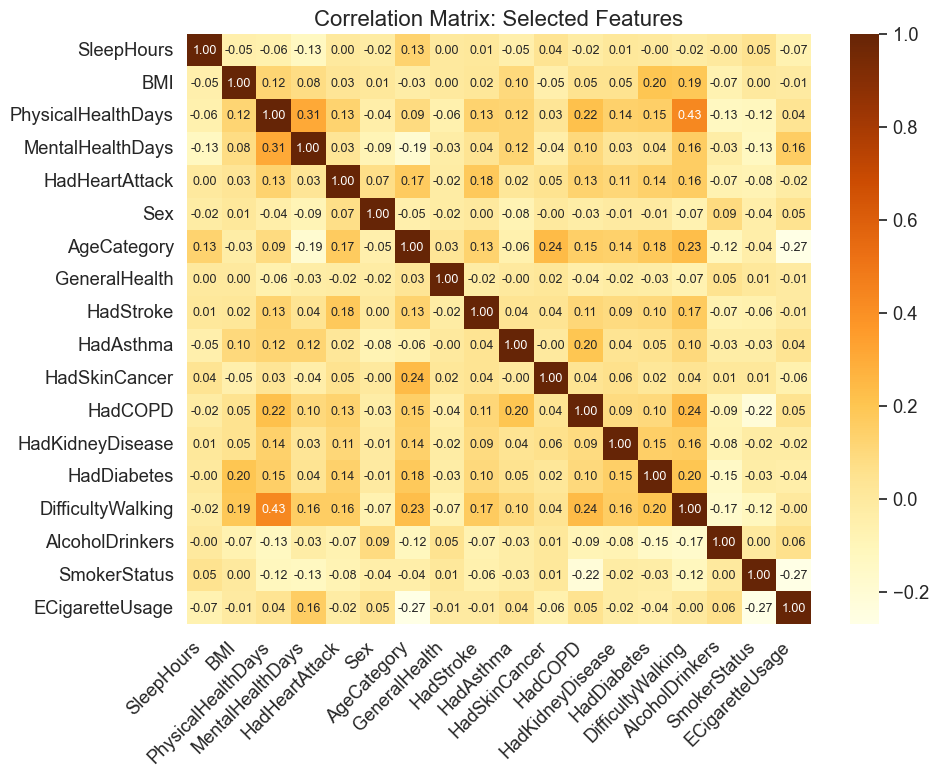

In [10]:
# ========================== Correlation Analysis ==========================
"""Plots and saves correlation heatmap """

selected_features = [
    'SleepHours', 'BMI', 'PhysicalHealthDays', 'MentalHealthDays',
    'HadHeartAttack', 'Sex', 'AgeCategory', 'GeneralHealth','HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadKidneyDisease', 
       'HadDiabetes','DifficultyWalking','AlcoholDrinkers','SmokerStatus','ECigaretteUsage'
]


df_selected = df[selected_features].copy()
for col in df_selected.select_dtypes(include='object').columns:
    df_selected[col] = LabelEncoder().fit_transform(df_selected[col])

correlation = df_selected.corr().round(2)
print(correlation)
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='YlOrBr', annot_kws={"size": 9})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix: Selected Features", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'correlation_selected_features.png'))
plt.show()
plt.close()



In [11]:
# ========================== Categorical Summary ==========================

"""Prints unique value counts of categorical columns."""
print("\n===== Categorical Variable Summary =====")
nunique = df.nunique().sort_values(ascending=False)
print(nunique)
print("\nSuggested categorical features for encoding:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")



===== Categorical Variable Summary =====
BMI                          3514
WeightInKilograms             516
HeightInMeters                101
State                          54
MentalHealthDays               31
PhysicalHealthDays             31
SleepHours                     23
AgeCategory                    13
RaceEthnicityCategory           5
GeneralHealth                   5
LastCheckupTime                 4
TetanusLast10Tdap               4
SmokerStatus                    4
RemovedTeeth                    4
ECigaretteUsage                 4
HadDiabetes                     4
CovidPos                        3
Sex                             2
PhysicalActivities              2
HadAngina                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadHeartAttack                  2
DifficultyDressingBathing       2
DifficultyWalking               2
DifficultyConcentrating         2
BlindOrVisionDifficulty         2
DeafOr

In [12]:
"""Prints and saves mean BMI and sleep hours by general health."""
print("\n📈 Average Sleep Hours and BMI by General Health:")
group = df.groupby("GeneralHealth")[["SleepHours", "BMI"]].mean().sort_values("SleepHours", ascending=False)
print(group)
   


📈 Average Sleep Hours and BMI by General Health:
               SleepHours        BMI
GeneralHealth                       
Excellent        7.156797  26.104377
Very good        7.074461  27.807982
Good             6.980170  29.795093
Fair             6.865977  31.047187
Poor             6.777625  30.907436
